In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('wrangled_transactions.csv', sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 738 non-null    float64
 1   2010 revenue               738 non-null    float64
 2   days_since_first_purchase  738 non-null    float64
 3   days_since_last_purchase   738 non-null    float64
 4   number_of_purchases        738 non-null    float64
 5   avg_order_cost             738 non-null    float64
 6   2011 revenue               738 non-null    float64
dtypes: float64(7)
memory usage: 40.5 KB


In [3]:
data.shape

(738, 7)

In [4]:
data.head()

,CustomerID,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
0,12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
1,12348.0,892.80,14.0,14.0,1.0,892.80,904.44
2,12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
3,12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
4,12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


In [5]:
data.tail()

,CustomerID,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
733,18229.0,653.20,29.0,22.0,2.0,326.60,6623.70
734,18239.0,438.10,28.0,28.0,1.0,438.10,1123.51
735,18245.0,365.73,11.0,11.0,1.0,365.73,2201.33
736,18259.0,376.30,22.0,22.0,1.0,376.30,1962.30
737,18260.0,230.70,14.0,14.0,1.0,230.70,2412.50


In [6]:
# The column that we will be making predictions with
inputs = data.iloc[:,1:-1]
inputs.shape

(738, 5)

In [7]:
inputs

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost
0,711.79,23.0,23.0,1.0,711.79
1,892.80,14.0,14.0,1.0,892.80
2,1868.02,16.0,13.0,2.0,934.01
3,1001.52,10.0,10.0,1.0,1001.52
4,600.72,8.0,8.0,1.0,600.72
...,...,...,...,...,...
733,653.20,29.0,22.0,2.0,326.60
734,438.10,28.0,28.0,1.0,438.10
735,365.73,11.0,11.0,1.0,365.73
736,376.30,22.0,22.0,1.0,376.30


In [8]:
# The column that we want to predict
outputs = data['2011 revenue']
outputs = np.array(outputs)
outputs.shape

(738,)

In [9]:
outputs

array([3.598210e+03, 9.044400e+02, 1.677670e+03, 6.266000e+02,
       1.249840e+03, 1.430000e+02, 2.338710e+03, 3.357760e+03,
       1.621380e+03, 5.223000e+02, 2.468900e+03, 5.713500e+03,
       4.940810e+03, 6.803970e+03, 4.804980e+03, 1.183550e+03,
       1.251923e+04, 1.137096e+04, 7.458900e+03, 4.619100e+02,
       6.425520e+03, 7.772500e+02, 2.324240e+03, 1.230602e+04,
       2.529220e+03, 3.588300e+03, 3.337280e+03, 1.740718e+04,
       1.166943e+04, 1.121293e+04, 7.413490e+03, 8.558000e+02,
       6.010290e+03, 2.516470e+03, 8.420830e+03, 3.925500e+03,
       5.124600e+03, 2.369530e+03, 2.438820e+03, 1.782401e+04,
       3.489740e+03, 1.740000e+02, 5.840340e+03, 3.733200e+03,
       1.867420e+03, 4.136800e+02, 3.542500e+02, 1.319720e+03,
       2.072500e+02, 2.923400e+02, 4.853970e+03, 3.516360e+03,
       3.674030e+03, 1.403760e+03, 2.214400e+02, 4.947000e+01,
       1.385710e+03, 2.066010e+03, 1.640000e+02, 1.589929e+04,
       1.670360e+03, 4.187896e+04, 4.251500e+02, 3.1756

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,outputs,
                                                   test_size=0.30,
                                                   random_state=1)

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [13]:
# Kiểm tra độ chính xác
print('The Train prediction accuracy is: ', knn.score(X_train, y_train)*100, '%')
print('The Test prediction accuracy is: ', knn.score(X_test, y_test)*100, '%')

The Train prediction accuracy is:  44.785496562286966 %
The Test prediction accuracy is:  21.555502219872512 %


In [14]:
y_pred = knn.predict(X_test)

In [15]:
df=pd.DataFrame({'Actual':pd.DataFrame(y_test)[0].values,
                 'Prediction':pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,25538.34,6352.214
1,1482.66,1579.246
2,341.28,573.184
3,3002.94,818.674
4,326.75,3684.996


In [16]:
# đánh giá model
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(outputs, knn.predict(inputs)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % knn.score(inputs, outputs))

Mean squared error: 13399821.29
Variance score: 0.34


In [18]:
list_k = []
list_mse_train = []
for K_value in range(2,int(y_train.shape[0]**0.5)):
    list_k.append(K_value)
    neigh = KNeighborsRegressor(n_neighbors= K_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    list_mse_train.append(mse)
    print("k=", K_value, ": MSE is ", mean_squared_error(y_test, y_pred))
    

k= 2 : MSE is  30411453.72292815
k= 3 : MSE is  27333874.707443193
k= 4 : MSE is  26603710.711965114
k= 5 : MSE is  26302127.521801114
k= 6 : MSE is  26240826.45509091
k= 7 : MSE is  26309289.169483967
k= 8 : MSE is  25451181.074557967
k= 9 : MSE is  25947880.80737848
k= 10 : MSE is  26110110.695136473
k= 11 : MSE is  25993985.00887799
k= 12 : MSE is  25869574.071301453
k= 13 : MSE is  25330506.911412988
k= 14 : MSE is  25501117.36571655
k= 15 : MSE is  25620808.403136805
k= 16 : MSE is  25755702.280152187
k= 17 : MSE is  25813237.880369708
k= 18 : MSE is  25887611.603709552
k= 19 : MSE is  25945131.530266136
k= 20 : MSE is  26070618.32388909
k= 21 : MSE is  26010065.979452252


In [19]:
list_k = []
list_mse_test = []
for K_value in range(2,int(y_train.shape[0]**0.5)):
    list_k.append(K_value)
    neigh = KNeighborsRegressor(n_neighbors= K_value)
    neigh.fit(X_test, y_test)
    y_pred = neigh.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    list_mse_test.append(mse)
    print("k=", K_value, ": MSE is ", mean_squared_error(y_test, y_pred))
    

k= 2 : MSE is  11663778.07876926
k= 3 : MSE is  16833371.662355553
k= 4 : MSE is  17836804.459668633
k= 5 : MSE is  18674576.339221817
k= 6 : MSE is  18966040.31340723
k= 7 : MSE is  20321034.179801963
k= 8 : MSE is  20468450.835041955
k= 9 : MSE is  20332552.718557812
k= 10 : MSE is  20250765.718940657
k= 11 : MSE is  20475539.961965863
k= 12 : MSE is  20814775.669905998
k= 13 : MSE is  21697907.671235774
k= 14 : MSE is  21863889.452993564
k= 15 : MSE is  21889662.43734943
k= 16 : MSE is  22085723.72666938
k= 17 : MSE is  22417768.07021668
k= 18 : MSE is  22601171.836015385
k= 19 : MSE is  22395618.691281233
k= 20 : MSE is  22302514.37468409
k= 21 : MSE is  22298767.163051587


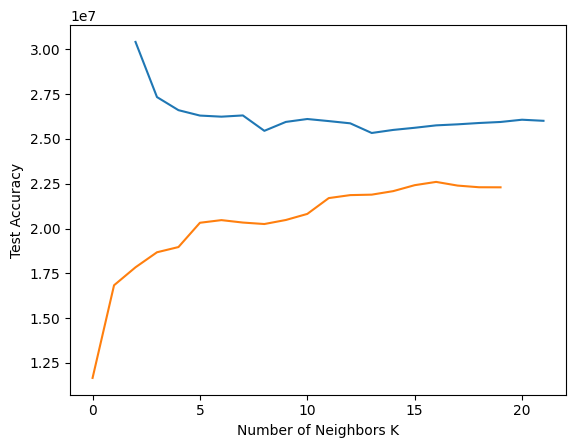

In [20]:
plt.plot(list_k,list_mse_train,list_mse_test)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()